In [2]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


In [3]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [4]:
model = Classifier()

images, labels = next(iter(testloader))
ps = torch.exp(model(images))
print(ps.shape)

torch.Size([64, 10])


In [5]:
top_p, top_class = ps.topk(1, dim=1)
print(top_class[:10,:])

tensor([[6],
        [6],
        [6],
        [6],
        [6],
        [6],
        [6],
        [6],
        [6],
        [6]])


In [6]:
equals = top_class == labels.view(*top_class.shape)
equals

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False

In [7]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 7.8125%


In [8]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0


In [10]:
train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps,labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1,dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
            
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.521..  Test Loss: 0.435..  Test Accuracy: 0.843
Epoch: 2/30..  Training Loss: 0.389..  Test Loss: 0.417..  Test Accuracy: 0.848
Epoch: 3/30..  Training Loss: 0.355..  Test Loss: 0.446..  Test Accuracy: 0.847
Epoch: 4/30..  Training Loss: 0.333..  Test Loss: 0.378..  Test Accuracy: 0.863
Epoch: 5/30..  Training Loss: 0.316..  Test Loss: 0.365..  Test Accuracy: 0.866
Epoch: 6/30..  Training Loss: 0.303..  Test Loss: 0.375..  Test Accuracy: 0.869
Epoch: 7/30..  Training Loss: 0.293..  Test Loss: 0.372..  Test Accuracy: 0.870
Epoch: 8/30..  Training Loss: 0.280..  Test Loss: 0.366..  Test Accuracy: 0.874
Epoch: 9/30..  Training Loss: 0.274..  Test Loss: 0.369..  Test Accuracy: 0.872
Epoch: 10/30..  Training Loss: 0.267..  Test Loss: 0.370..  Test Accuracy: 0.875
Epoch: 11/30..  Training Loss: 0.259..  Test Loss: 0.358..  Test Accuracy: 0.878
Epoch: 12/30..  Training Loss: 0.255..  Test Loss: 0.371..  Test Accuracy: 0.882
Epoch: 13/30..  Training Loss: 0.248.

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

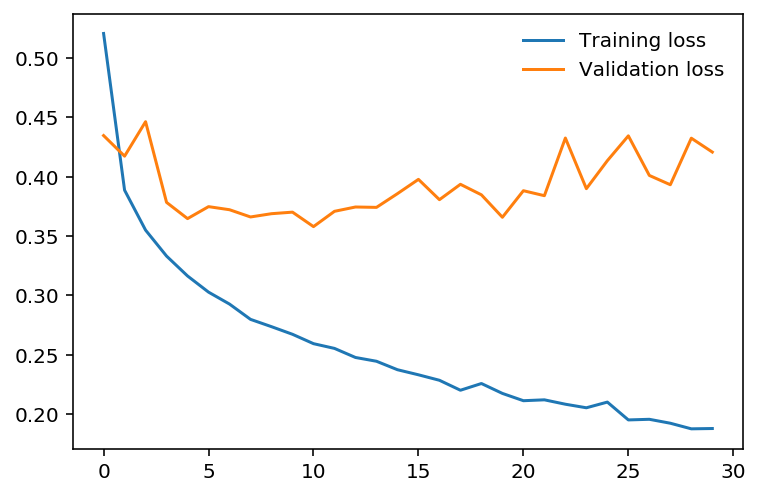

In [12]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [13]:
#overfitting 


In [9]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [10]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 10
steps = 0


In [11]:
train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps,labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1,dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
          
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
            
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/10..  Training Loss: 0.603..  Test Loss: 0.552..  Test Accuracy: 0.797
Epoch: 2/10..  Training Loss: 0.484..  Test Loss: 0.483..  Test Accuracy: 0.828
Epoch: 3/10..  Training Loss: 0.447..  Test Loss: 0.475..  Test Accuracy: 0.838
Epoch: 4/10..  Training Loss: 0.433..  Test Loss: 0.480..  Test Accuracy: 0.833
Epoch: 5/10..  Training Loss: 0.421..  Test Loss: 0.455..  Test Accuracy: 0.847
Epoch: 6/10..  Training Loss: 0.407..  Test Loss: 0.499..  Test Accuracy: 0.827
Epoch: 7/10..  Training Loss: 0.406..  Test Loss: 0.467..  Test Accuracy: 0.839
Epoch: 8/10..  Training Loss: 0.394..  Test Loss: 0.466..  Test Accuracy: 0.837
Epoch: 9/10..  Training Loss: 0.392..  Test Loss: 0.466..  Test Accuracy: 0.841
Epoch: 10/10..  Training Loss: 0.388..  Test Loss: 0.450..  Test Accuracy: 0.847


In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

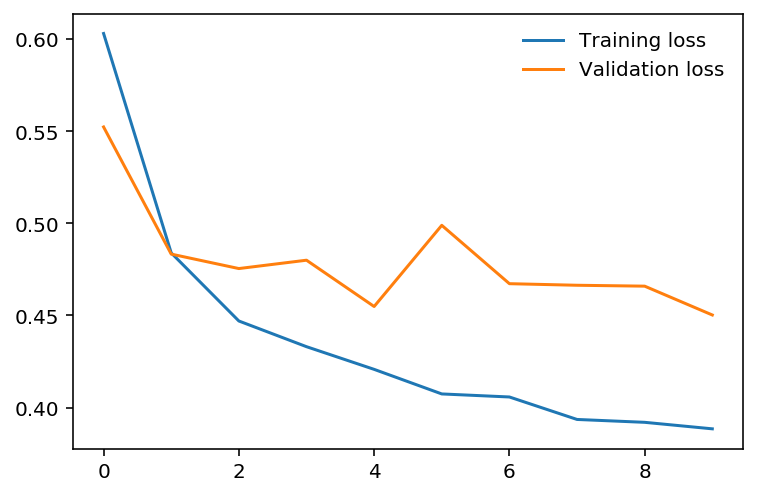

In [13]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

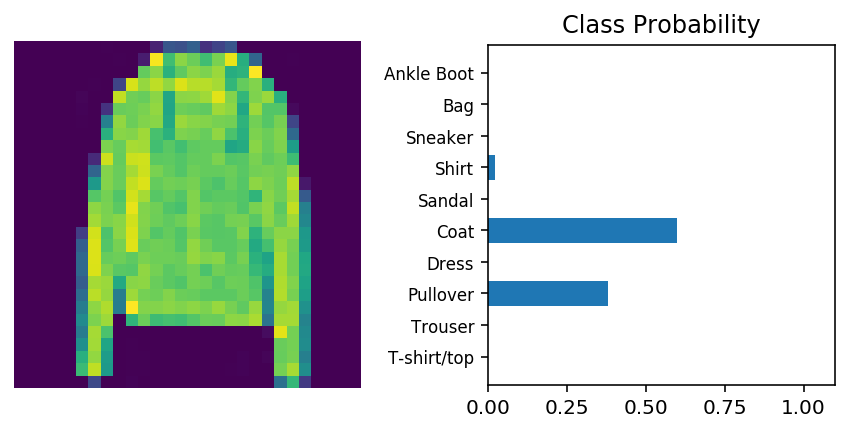

In [14]:
import helper
model.eval()
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.view(1, 784)
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')